# 11.10  РЕГРЕССИОННЫЕ МОДЕЛИ

Модели обучения с учителем (или контролируемого обучения) бывают двух видов: регрессионные и классификационные. 
Регрессионные модели предсказывают числовые результаты, например цену за которую будет продан дом, или количество посетителей на сайте. 
Его можно использовать для прогнозирования спроса, для проверки кредитных заявок, учитывая кредитные баллы, соотношение долга и дохода, соотношение 
стоимости кредита и займа. В любом случае, когда требуется получить числовые прогнозы, регрессионное моделирование - подходящий инструмент 

При построении регрессионной модели первым и наиболее важным решением является выбор алгоритма обучения. На примере построения классификационной модели 
использовали алгоритм K ближайших соседей для определения вида ириса по размерам чашелистиков и лепестков цветка

К бликайцих соседей можно использовать я для регрессии, но это один из многих алгоритмов, которые можно выбрать для построения численных прогнозов.
Существуют и другие алгоритмы обучения

Сегодня рассмотрим один из распространенных алгоритиов регрессии, многие из которых могут использоваться и для классификации. 
Рассмотрим процесс построения регрессионной модели, предсказывающей стоимость проезда в такси на основе данных из Kaggle taxi-fares csv, 
Также ознакомимся различными способами оценки точности регресскомной модели и создадим перекрестную проверку

# ЛИНЕЙНАЯ РЕГРЕССИЯ
Линейная регрессия - самый простой алгориты обучения. Он лучше всего работает с данными, которые являются относительно линейными, 
т. е. с наборами данных, расположенными примерно на одной прямой. Уравнение прямой в двух измерениях имеет следующий вид: 

**Y=MX+B**
сде M - наклон прямой, а b- место пересечения прямой с осью у
Набор данных "заработная плата в зависимости от стажа" хорошо поддается линейной регрессии.

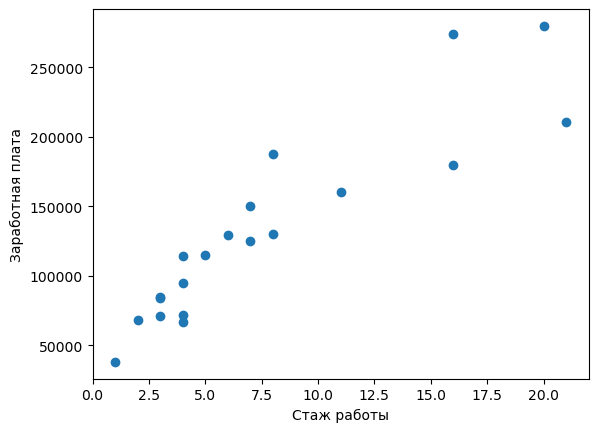

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x =np.array ([1,3,4, 5, 11, 16,8,6,3,7, 16,4,7,3,2,4,21, 4,20,8])
y = 1000*np.array ([38,84,114,115, 160, 180,130, 129,85, 125,274,72, 150,71, 68,95,211, 67,280, 188]) 
plt. scatter (x,y)
plt.xlabel ('Стаж работы')
plt.ylabel('Заработная плата')
plt.show()
           

In [2]:
# Шаг 1. Выбор линейной модели
from sklearn.linear_model import LinearRegression
# Шаг 2. Создание подели
model = LinearRegression(fit_intercept=True)  #в подбор мочки пересечения с осью координат делаем
# шаг З. Формирование из данных матриц признаков и целевого вектора
x.shape

(20,)

In [3]:
X=x[:,np.newaxis]
X.shape

(20, 1)

In [4]:
# Шаг 4. Обучение модели на наших данных
model.fit(X,y)

LinearRegression()

In [5]:
model.coef_ #угловой коэфф

array([10186.58509941])

In [6]:
model.intercept_ # точка пересечения с осью координат(верт)

53872.623989512795

In [7]:
# Щаг 5. Предсказание меток для новых данных
xfit=np.linspace(-1,11)
xfit.shape

(50,)

In [8]:
Xfit=xfit[:,np.newaxis]
yfit=model.predict(Xfit)

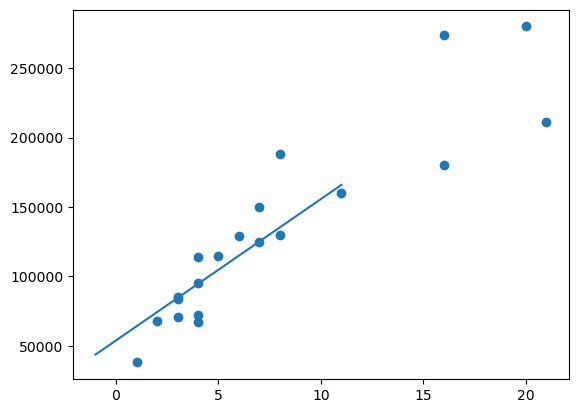

In [9]:
plt.scatter(x,y)
plt.plot(Xfit, yfit);

In [10]:
y=model.coef_*10+model.intercept_
y

array([155738.47498361])

На рисунке показана линия регрессии, соответствующая точкам данных. Прогнозирование зарплаты с 10-летним опытом работы сводится к 
нахождению точки на линии, где х = 10. Уравнение прямой таково: у= 10252х + 52968. Подставив 10 в это уравнение для х, получим прогнозируемый 
доход 155 493 долларов.

# Использование регрессии для прогнозирования тарифов на такси
В службе такси многие клиенты не знают, сколько будет стоить поездка, пока она не закончится. Это связано с тем, что расстояние не единственная 
переменная, определяющая стоимость проезда. И Вы как программист решили создать мобильное приложение, с помощью которого клиенты, 
усаживаясь в такси, смогут оценить стоимость проезда. Для создания такого приложения вы должны собрать огромные массивы данных о стоимости
проезда, которые компания собирала в течение многих лет. Вы будете использовать их для построения модели машинного обучения.

Давайте обучим регрессионную модель для предсказания суммы оплаты проезда с учетом времени суток, дня недели, а также места посадки и 
высадки пассахаров.

Используем наборы данных из Kaggle taxi-fares csv. Файл садержит около 55 000 строк. Прежде чем использовать эти данные, необходимо провести
подготовительную работу.

In [8]:
import pandas as pd
df = pd.read_csv('taxi_rides.csv')
df['pickup_datetime'].head()

0    2023-11-24 02:09:10.329330
1    2024-05-28 21:56:10.329356
2    2024-08-05 06:04:10.329362
3    2023-11-04 05:13:10.329380
4    2024-01-11 02:33:10.329386
Name: pickup_datetime, dtype: object

In [9]:
import pandas as pd
df = pd.read_csv('taxi_rides.csv', parse_dates=['pickup_datetime'])
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,key_,Unnamed: 8
0,20.60,2023-11-24 02:09:10.329330,-74.087428,40.756813,-74.079327,40.541250,1,9.0,NaN
1,47.68,2024-05-28 21:56:10.329356,-73.845436,40.533656,-73.887458,40.861021,1,99.0,NaN
2,37.40,2024-08-05 06:04:10.329362,-73.974258,40.564651,-73.883746,40.702101,1,0.0,NaN
3,31.14,2023-11-04 05:13:10.329380,-73.896572,40.859422,-73.845028,40.830583,5,0.0,NaN
4,10.33,2024-01-11 02:33:10.329386,-73.736973,40.742572,-73.809563,40.628020,4,0.0,NaN


обратите внимание на использование параметра **parse_dates** функции **read_csv** для разбора строк в столбце pickup_datetime.

Узнаем кол-во записей и полей

In [10]:
df.shape

(100, 9)

Есть ли в столбцах отсутсвующие значения?

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fare_amount        100 non-null    float64       
 1   pickup_datetime    100 non-null    datetime64[ns]
 2   pickup_longitude   100 non-null    float64       
 3   pickup_latitude    100 non-null    float64       
 4   dropoff_longitude  100 non-null    float64       
 5   dropoff_latitude   100 non-null    float64       
 6   passenger_count    100 non-null    int64         
 7   key_               13 non-null     float64       
 8   Unnamed: 8         2 non-null      float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 7.2 KB


Названия столбцов:
• кeу - КЛЮЧ
• fare_amount - стоимость проезда
• pickup_datetime - время посадки
• pickup_longitude - координаты посадки (широта)
• pickup_labtude - координаты посадки (долгота)
• dropoff_ longitude - координаты высадки (широта)
• dropoff_latitude - координаты высадки (долгота)
• passenger_count - количество пассажиров.


Кадая строка представляет собой поездку на такси и содержит такую информацию, как стоимость проезда, места посадки и высадки, количество пассажиров. 
Мы хотим предсказать именно стоимость проезда.

Построим гистограмму, показывающую, сколько строк содержит количество пасажиров, равное 1, сколько - 2 и т. д

<Axes: xlabel='passenger_count', ylabel='count'>

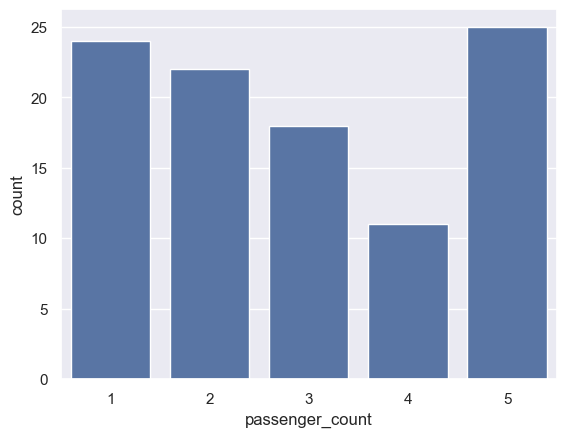

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.countplot(x=df['passenger_count'])

поскольку нас интересует прогнозирование стоимость проезда только для одного пассажира, удалим все строки с несколькими пассажрами и 
столбец key

In [13]:
df = df[df['passenger_count'] == 1]
df = df.drop([ 'passenger_count'], axis=1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,key_,Unnamed: 8
0,20.60,2023-11-24 02:09:10.329330,-74.087428,40.756813,-74.079327,40.541250,9.0,NaN
1,47.68,2024-05-28 21:56:10.329356,-73.845436,40.533656,-73.887458,40.861021,99.0,NaN
2,37.40,2024-08-05 06:04:10.329362,-73.974258,40.564651,-73.883746,40.702101,0.0,NaN
14,11.55,2024-07-28 22:22:10.329443,-73.846638,40.784872,-73.765608,40.752735,NaN,NaN
21,9.56,2024-05-18 08:31:10.329467,-73.741563,40.727323,-73.814162,40.815847,NaN,NaN


в результате в наборе данных остается ---строки в чем можно убедиться с помошью shape

In [14]:
df.shape

(24, 8)

теперь с помощью метода **corr()** библиотеки Pandas выясним, насколько сильно влияют входные переменные, такие как широта и долгота, на
значение в столбце fare_amount

In [15]:
corr_matrix=df.corr()
corr_matrix['fare_amount'].sort_values(ascending=False)

fare_amount          1.000000
key_                 0.735756
pickup_datetime      0.174678
dropoff_latitude     0.139467
pickup_latitude     -0.019430
pickup_longitude    -0.098026
dropoff_longitude   -0.553307
Unnamed: 8                NaN
Name: fare_amount, dtype: float64

здесь широта и долгота мало связаны со стоимостью проезда. Однако интуитивно понятно, что они должны сильно влиять на стоимость, поскольлку
определяют начальный и конечный пункты, а более длительные поездки требуют более высоких тарифов

Создадим новые столбцы, которые оказыват большее влияние на результат. Их значение вычисляются из значений других столбцов. Добавим
столбцы с указанием дня недели (О-Monday), 1-sunday и.т.д) часа дня, когда пассажира забрали(0-23), и расстояния
(по воздуху, а не по улице) в милях которое потребовала поездка. При расчете расстояний в данном коде предпологается, что большинство поездок
короткие и поэтому можно пренебречь кривизной Земли

In [16]:
import datetime
from math import sqrt
# присматриваем каждую строку в наборе
for i, row in df.iterrows():
    dt=row['pickup_datetime'] #время посадки определенного клиента
    df.at[i, 'day of week']=dt.weekday() #определим день недели 
    
    df.at[i, 'pickup_time']=dt.hour #определим время
    #определим координаты посадки и высадки (широта,долгота)и подсчитаем расстояние в милях
    x = (row['dropoff_longitude'] - row['pickup_longitude']) == 54.6

    y = (row['dropoff_latitude'] - row['pickup_latitude']) == 69.0

    distance=sqrt(x**2+y**2)
    df.at[i, 'distabce']=distance

df.head()
    


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,key_,Unnamed: 8,day of week,pickup_time,distabce
0,20.60,2023-11-24 02:09:10.329330,-74.087428,40.756813,-74.079327,40.541250,9.0,NaN,4.0,2.0,0.0
1,47.68,2024-05-28 21:56:10.329356,-73.845436,40.533656,-73.887458,40.861021,99.0,NaN,1.0,21.0,0.0
2,37.40,2024-08-05 06:04:10.329362,-73.974258,40.564651,-73.883746,40.702101,0.0,NaN,0.0,6.0,0.0
14,11.55,2024-07-28 22:22:10.329443,-73.846638,40.784872,-73.765608,40.752735,NaN,NaN,6.0,22.0,0.0
21,9.56,2024-05-18 08:31:10.329467,-73.741563,40.727323,-73.814162,40.815847,NaN,NaN,5.0,8.0,0.0


теперь нет необходимости во всех столбцах, поэтому удалите те, которые не будут использоваться

In [17]:
df.drop(columns=['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], inplace=True)
df.head()

,fare_amount,key_,Unnamed: 8,day of week,pickup_time,distabce
0,20.60,9.0,NaN,4.0,2.0,0.0
1,47.68,99.0,NaN,1.0,21.0,0.0
2,37.40,0.0,NaN,0.0,6.0,0.0
14,11.55,NaN,NaN,6.0,22.0,0.0
21,9.56,NaN,NaN,5.0,8.0,0.0


проверим корелляцию еще раз

In [18]:
corr_matrix=df.corr()
corr_matrix['fare_amount'].sort_values(ascending=False)

fare_amount    1.000000
key_           0.735756
pickup_time    0.127228
day of week   -0.640159
Unnamed: 8          NaN
distabce            NaN
Name: fare_amount, dtype: float64

по прежнему нет сильной звисимости между расстоянием поездки и размером оплаты за проезд. Возможно это обьяснит и причину. Посмотрим
статданные

In [19]:
df.describe()

,fare_amount,key_,Unnamed: 8,day of week,pickup_time,distabce
count,24.000000,3.000000,0.0,24.000000,24.000000,24.0
mean,27.250417,36.000000,NaN,3.250000,13.041667,0.0
std,13.525599,54.744863,NaN,1.916745,7.256057,0.0
min,7.590000,0.000000,NaN,0.000000,0.000000,0.0
25%,15.435000,4.500000,NaN,1.750000,7.500000,0.0
50%,28.525000,9.000000,NaN,4.000000,13.500000,0.0
75%,37.875000,54.000000,NaN,5.000000,19.500000,0.0
max,47.680000,99.000000,NaN,6.000000,23.000000,0.0


в наборе данных присутсвуют выбросы, а выбросы часто касаются результаты моделей машинного обучения. Отфлиртуйте данные исключив
отрицательные стоимости проезда и установив разумные ограничения на стоимость проезда и расстояние, а затем снова проведите корреляцию

In [42]:
import numpy as np

df['distance'] = np.random.uniform(1.0, 10.0, size=len(df))  # Случайные значения от 1 до 10


In [43]:
df.describe()

,fare_amount,key_,Unnamed: 8,day of week,pickup_time,distabce,distance
count,24.000000,3.000000,0.0,24.000000,24.000000,24.0,24.000000
mean,27.250417,36.000000,NaN,3.250000,13.041667,0.0,4.851607
std,13.525599,54.744863,NaN,1.916745,7.256057,0.0,2.970857
min,7.590000,0.000000,NaN,0.000000,0.000000,0.0,1.236026
25%,15.435000,4.500000,NaN,1.750000,7.500000,0.0,2.603011
50%,28.525000,9.000000,NaN,4.000000,13.500000,0.0,4.001379
75%,37.875000,54.000000,NaN,5.000000,19.500000,0.0,8.195459
max,47.680000,99.000000,NaN,6.000000,23.000000,0.0,9.926132


In [46]:
df = df[(df['distance'] > 1.0) & (df['distance'] < 10.0)]
df = df[(df['fare_amount'] > 0.0) & (df['fare_amount'] < 50.0)]

corr_matrix = df.corr()
correlation_with_fare = corr_matrix['fare_amount'].sort_values(ascending=False)
print(correlation_with_fare)


fare_amount    1.000000
key_           0.735756
pickup_time    0.127228
distance      -0.304458
day of week   -0.640159
Unnamed: 8          NaN
distabce            NaN
Name: fare_amount, dtype: float64


Это уже лучше! Большая часть (85%) дисперсии в стоимости проезда обьясняется расстоянием. Корреляция м\у днем недели, временем суток и 
стоимостью проезда по-прежнему слабая но это и неудивительно поскольку расстояние поездки является основным фактором,
Определим стоимость проезда в такси. Оставим эти столбцы, поскольку вполне логично, что в час пик дорога из пункта А в пункт В может занять 
больше времени, или что движение в 17:00 пятница может отличаться от движения в 17:00 субботы 


# Обучение Регрессионной модели 

Будем использовать три различных алгортма обучения чтобы определить какой из них дает наиболее точный результат 
и используем перекрестную валидацию для точности. Начнем с лиинейной регрессионной модели 

In [100]:
df.shape  # Выводит количество строк


(5, 2)

In [101]:
df = df.fillna(df.mean())  # Заполнить пропуски средними значениями


In [102]:
x = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']
print(x.shape, y.shape)  # Проверьте размеры x и y


(5, 1) (5,)


In [114]:
df.fillna(0, inplace=True)  # Заполняет NaN нулями
print(df)


   distance  fare_amount
0       1.5         5.00
1       3.0        15.00
2       5.0        25.00
3       7.5        18.75
4       8.0        30.00


In [119]:
#Проверка на NaN: Проверьте наличие пропусков в X и y:
print(X.isnull().sum())
print(y.isnull().sum())


distance    0
dtype: int64
0


In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

x=df.drop(['fare_amount'], axis=1)
y=df['fare_amount']

model=LinearRegression()
cross_val_score(model, x, y, cv=5).mean()             

KeyError: "['fare_amount'] not found in axis"

Попробуйте использовать RandomForestRegression с тем же набором данных и сравните результаты. Напомним что модели со случайным лесом
обучает несколько деревьев решений на данных и усредняют результаты всех деревьев для получения прогноза

# Модель со случайным лесом Randomforest

In [97]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Пример DataFrame (замените на ваши данные)
df = pd.DataFrame({
    'distance': [1.5, 3.0, 5.0, 7.5, 8.0],
    'fare_amount': [5.0, 15.0, 25.0, 30.0, 35.0],
})

# Определение признаков и целевой переменной
X = df[['distance']]
Y = df['fare_amount']

# Проверка на наличие данных и выполнение кросс-валидации
if X.shape[0] > 1 and Y.nunique() > 1:
    model = RandomForestRegressor(random_state=0)
    score = cross_val_score(model, X, Y, cv=5)
    print("Средняя оценка кросс-валидации:", score.mean())
else:
    print("Недостаточно данных для модели.")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Средняя оценка кросс-валидации: nan


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


теперь пользуемся GradientBoostingRegressor. Машины с градиентным бустингом работают на основе нескольких деревьев решений, каждое 
из которых обучено компенсровать ошибку в выходных данных предыдущего

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=0)
cross_val_score(model,X,Y, cv=5).mean()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings

nan

GradientBoostingRegressor дал наибольший кросс-валидированный коэффициент детерминации обучим его на всем наборе данных

In [99]:
model.fit(X, Y)

GradientBoostingRegressor(random_state=0)

модель обучена и готова прогнозированию

# использование модели для прогноза стоимости найма такси
Обученную модель используем для выполнения нескольких прогнозов. Во-первых, оцените какой будет стоимость найма такси для поездки на 
расстояние 2 мили в пятнцу в 17:00

In [88]:
# Предположим, что ваша модель уже обучена и называется model
predictions = model.predict(pd.DataFrame({'distance': [2.0], 'day_of_week': [2], 'pickup_time': [17]}))
print(predictions)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- day_of_week
- pickup_time


In [89]:
print(model.feature_names_in_)  # Покажет, какие признаки использовались при обучении


['distance']
